# Задания для самостоятельного выполнения

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, recall_score

In [ ]:
x, y = make_classification(n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

## 1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

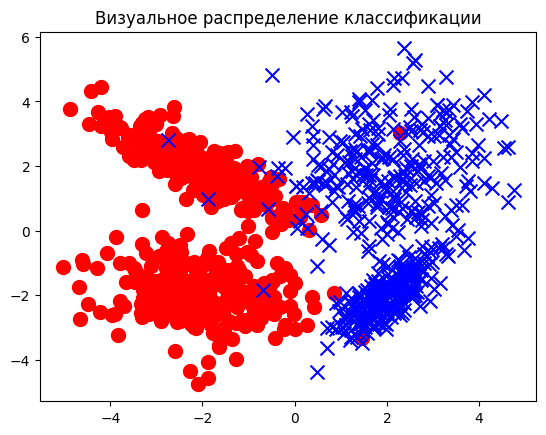

In [ ]:
plt.scatter(x[:, 0][y==0], x[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(x[:, 0][y==1], x[:, 1][y==1], marker="x", c='b', s=100)
plt.title('Визуальное распределение классификации')
plt.show()

In [ ]:
model = LogisticRegression()

In [ ]:
X = np.hstack([np.ones(x.shape[0])[:, np.newaxis], x])
X

array([[ 1.        ,  1.86341137,  0.08764555],
       [ 1.        , -1.53099717,  1.90118241],
       [ 1.        , -0.01722404, -2.59111159],
       ...,
       [ 1.        ,  2.33019532,  4.72180951],
       [ 1.        , -2.01084076,  1.42633933],
       [ 1.        , -2.00873243,  2.24540194]])

In [ ]:
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
ac = accuracy_score(y, model.predict(X))
f1 = f1_score(y, model.predict(X))
print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')

accuracy = 0.98
F1-score = 0.98


In [ ]:
y_pred_proba = model.predict_proba(X)

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *x) for x in XX])
XX

array([[ 1.        , -6.03367039, -5.76154392],
       [ 1.        , -6.02367039, -5.76154392],
       [ 1.        , -6.01367039, -5.76154392],
       ...,
       [ 1.        ,  5.72632961,  6.62845608],
       [ 1.        ,  5.73632961,  6.62845608],
       [ 1.        ,  5.74632961,  6.62845608]])

In [ ]:
Z = model.predict_proba(XX)[:,1]
Z = Z.reshape(xx.shape)

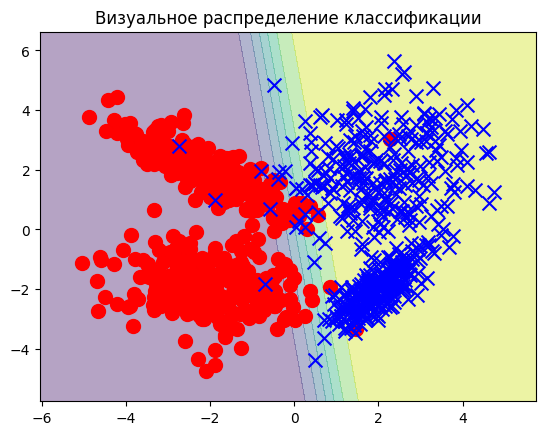

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)
plt.title('Визуальное распределение классификации')
plt.show()

## 2.Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [ ]:
class SGD():
  def __init__(self, alpha=0.5, n_iters=1000):
    self.b = None
    self._alpha = alpha
    self._n_iters = n_iters

  def gradient_step(self, b, b_grad):
    return b - self._alpha * b_grad

  def optimize(self, X, y, start_b, n_iters):
    b = start_b.copy()
    for i in range(n_iters):
      b_grad = self.grad_func(X, y, b)
      b = self.gradient_step(b, b_grad)
    return b

  def fit(self, X, y):
    m = X.shape[1]
    start_b = np.ones(m)
    self.b = self.optimize(X, y, start_b, self._n_iters)

In [ ]:
class LogReg(SGD):

  def sigmoid(self, X, b):
    return 1./ (1. + np.exp(-X.dot(b)))

  def grad_func(self, X, y, b):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
    return grad

  def predict_proba(self, X):
    return self.sigmoid(X, self.b)

  def predict(self, X):
    y_pred = self.predict_proba(X) > 0.5
    return y_pred

In [ ]:
logreg = LogReg(alpha=0.0001)

In [ ]:
X = np.hstack([np.ones(x.shape[0])[:, np.newaxis], x])

In [ ]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [ ]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')

accuracy = 0.73
F1-score = 0.77


In [ ]:
y_pred_proba = logreg.predict_proba(X)

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [ ]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

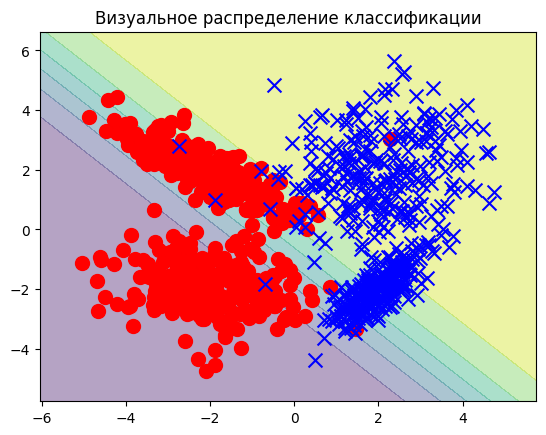

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)
plt.title('Визуальное распределение классификации')
plt.show()

In [ ]:
logreg = LogReg(alpha=100)

In [ ]:
X = np.hstack([np.ones(x.shape[0])[:, np.newaxis], x])

In [ ]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

<ipython-input-138-5378cd5e6943>:4: RuntimeWarning: overflow encountered in exp
  return 1./ (1. + np.exp(-X.dot(b)))


In [ ]:
y_pred_proba = logreg.predict_proba(X)

In [ ]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')

accuracy = 0.98
F1-score = 0.98


In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [ ]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

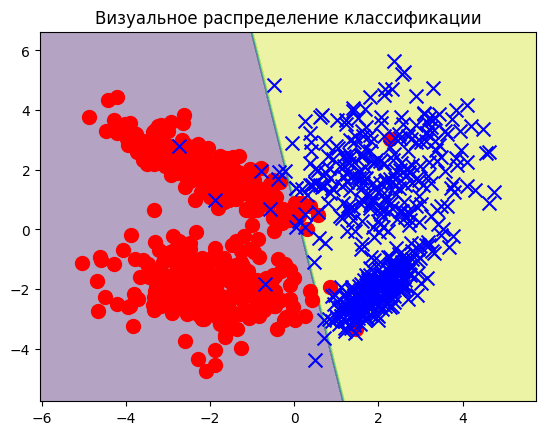

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)
plt.title('Визуальное распределение классификации')
plt.show()

## 3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [ ]:
class SGD():
  def __init__(self, alpha=0.5, n_iters=1000):
    self.b = None
    self._alpha = alpha
    self._n_iters = n_iters

  def gradient_step(self, b, b_grad):
    return b - self._alpha * b_grad

  def optimize(self, X, y, start_b, n_iters):
    b = start_b.copy()
    for i in range(n_iters):
      b_grad = self.grad_func(X, y, b)
      b = self.gradient_step(b, b_grad)
    return b

  def fit(self, X, y):
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    m = X.shape[1]
    start_b = np.ones(m)
    self.b = self.optimize(X, y, start_b, self._n_iters)

In [ ]:
class LogReg(SGD):

  def sigmoid(self, X, b):
    return 1./ (1. + np.exp(-X.dot(b)))

  def grad_func(self, X, y, b):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
    return grad

  def predict_proba(self, X):
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    return self.sigmoid(X, self.b)

  def predict(self, X):
    y_pred = self.predict_proba(X) > 0.5
    return y_pred

In [ ]:
logreg = LogReg(alpha=0.5)

In [ ]:
logreg.fit(x, y)
y_pred = logreg.predict(x)

In [ ]:
y_pred_proba = logreg.predict_proba(x)

In [ ]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')

accuracy = 0.98
F1-score = 0.98


In [ ]:
xx, yy = np.meshgrid(
    np.arange(x.min(axis=0)[0]-1, x.max(axis=0)[0]+1, 0.01),
    np.arange(x.min(axis=0)[1]-1, x.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

In [ ]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)
Z.shape

(1240, 1179)

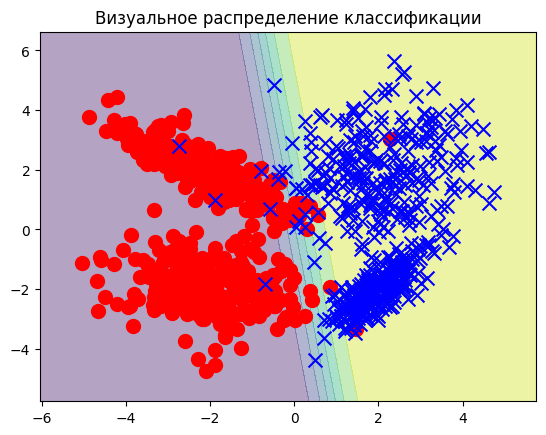

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x[:, 0][y==0], x[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(x[:, 0][y==1], x[:, 1][y==1], marker="x", c='b', s=100)
plt.title('Визуальное распределение классификации')
plt.show()

## 4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

In [ ]:
def vis(n):
  x, y = make_classification(n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=n,
                          random_state=1)

  model = LogisticRegression()
  X = np.hstack([np.ones(x.shape[0])[:, np.newaxis], x])
  model.fit(X, y)

  xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
  XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
  XX = np.array([(1, *x) for x in XX])

  Z = model.predict_proba(XX)[:,1]
  Z = Z.reshape(xx.shape)


  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
  plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)
  plt.title(f'Визуальное распределение классификации при class_sep={n}')
  plt.show()

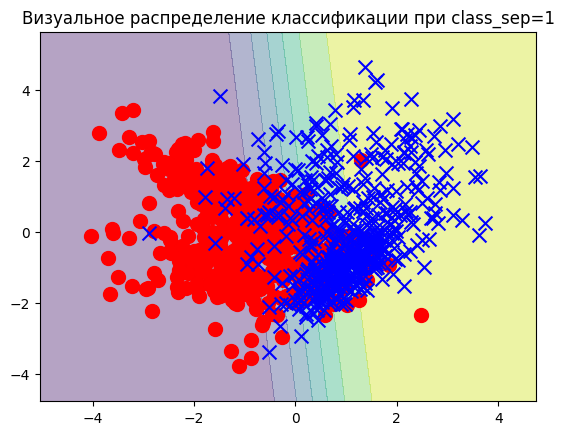

In [ ]:
vis(1)

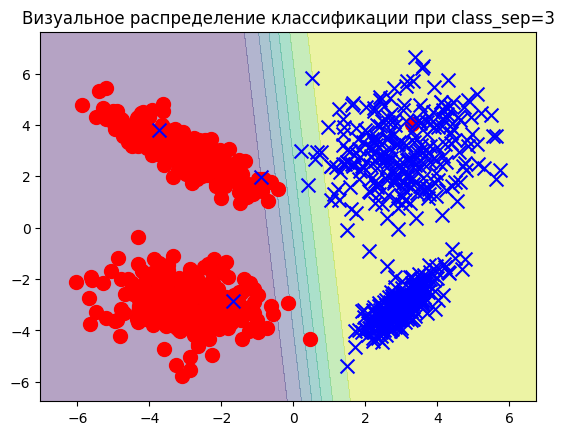

In [ ]:
vis(3)

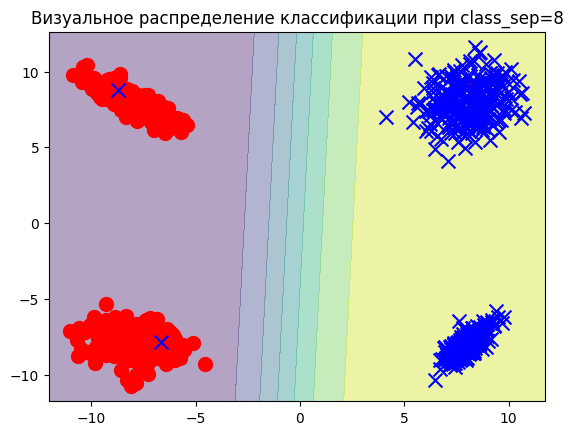

In [ ]:
vis(8)

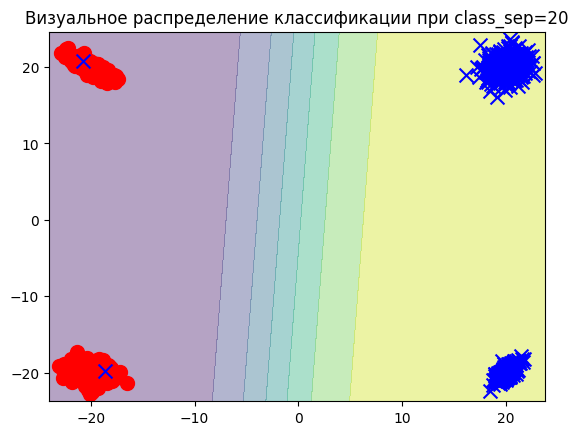

In [ ]:
vis(20)

**Увеличение параметра class_sep упрощает задачу классификации**

## 5.Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [ ]:
x, y = make_classification(n_samples=1000,
                          n_features=10,
                          n_informative=10,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
x.shape

(1000, 10)

In [ ]:
logreg = LogReg()

In [ ]:
logreg.fit(x, y)
y_pred = logreg.predict(x)

In [ ]:
y_pred_proba = logreg.predict_proba(x)

In [ ]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
ll = log_loss(y, y_pred)
rec = recall_score(y, y_pred)
print(f'accuracy = {ac:.2f}\nF1-score = {f1:.2f}')

accuracy = 0.99
F1-score = 0.99


## 6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [ ]:
x, y = make_classification(n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=4,
                          class_sep=3,
                          n_clusters_per_class = 1,
                          random_state=1)
x

array([[ 2.86341137,  1.08764555],
       [-2.53099717,  2.90118241],
       [-1.01722404, -3.59111159],
       ...,
       [ 3.33019532,  5.72180951],
       [-3.01084076,  2.42633933],
       [-3.00873243,  3.24540194]])

In [ ]:
y1 = np.where(y == 0, 1, 0)
l1 = LogReg()
l1.fit(x, y1)
y1_proba = l1.predict_proba(x)

In [ ]:
y2 = np.where(y == 1, 1, 0)
l2 = LogReg()
l2.fit(x, y2)
y2_proba = l2.predict_proba(x)

In [ ]:
y3 = np.where(y == 2, 1, 0)
l3 = LogReg()
l3.fit(x, y3)
y3_proba = l3.predict_proba(x)

In [ ]:
y4 = np.where(y == 3, 1, 0)
l4 = LogReg()
l4.fit(x, y4)
y4_proba = l4.predict_proba(x)

In [ ]:
def classification(y):
  y = np.array(y)
  return np.argmax(y, axis=0)

y_pred = classification([y1_proba, y2_proba, y3_proba, y4_proba])
y_pred[:10]

array([3, 2, 0, 0, 3, 1, 1, 0, 0, 0])

In [ ]:
ac = accuracy_score(y, y_pred)
print(f'accuracy = {ac:.2f}')

accuracy = 0.99


In [ ]:
xx, yy = np.meshgrid(
    np.arange(x.min(axis=0)[0]-1, x.max(axis=0)[0]+1, 0.01),
    np.arange(x.min(axis=0)[1]-1, x.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([xx for xx in XX])
Z1 = l1.predict_proba(XX)
Z1 = Z1.reshape(xx.shape)

In [ ]:
xx, yy = np.meshgrid(
    np.arange(x.min(axis=0)[0]-1, x.max(axis=0)[0]+1, 0.01),
    np.arange(x.min(axis=0)[1]-1, x.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([xx for xx in XX])
Z2 = l2.predict_proba(XX)
Z2 = Z2.reshape(xx.shape)

In [ ]:
xx, yy = np.meshgrid(
    np.arange(x.min(axis=0)[0]-1, x.max(axis=0)[0]+1, 0.01),
    np.arange(x.min(axis=0)[1]-1, x.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([xx for xx in XX])
Z3 = l3.predict_proba(XX)
Z3 = Z3.reshape(xx.shape)

In [ ]:
xx, yy = np.meshgrid(
    np.arange(x.min(axis=0)[0]-1, x.max(axis=0)[0]+1, 0.01),
    np.arange(x.min(axis=0)[1]-1, x.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([xx for xx in XX])
Z4 = l4.predict_proba(XX)
Z4 = Z4.reshape(xx.shape)

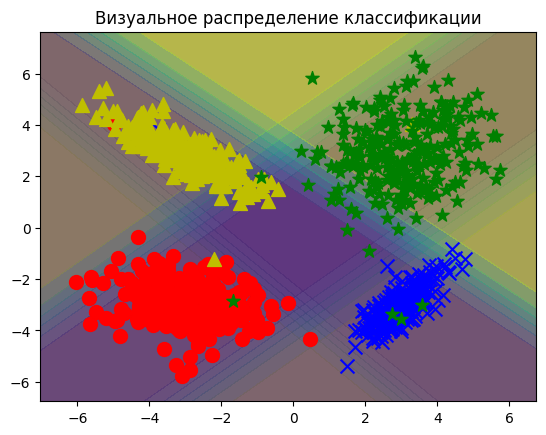

In [ ]:
plt.contourf(xx, yy, Z1, alpha=0.4)
plt.contourf(xx, yy, Z2, alpha=0.4)
plt.contourf(xx, yy, Z3, alpha=0.4)
plt.contourf(xx, yy, Z4, alpha=0.4)
plt.scatter(x[:, 0][y==0], x[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(x[:, 0][y==1], x[:, 1][y==1], marker="x", c='b', s=100)
plt.scatter(x[:, 0][y==2], x[:, 1][y==2], marker="^", c='y', s=100)
plt.scatter(x[:, 0][y==3], x[:, 1][y==3], marker="*", c='g', s=100)
plt.title(f'Визуальное распределение классификации')
plt.show()

## 7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression()

In [ ]:
pd.DataFrame(model.predict_proba(x).round(4))

,0,1,2,3
0,0.0000,0.0498,0.0043,0.9459
1,0.0025,0.0000,0.9865,0.0110
2,0.9820,0.0146,0.0034,0.0001
3,0.9981,0.0000,0.0019,0.0000
4,0.0000,0.0144,0.0000,0.9856
...,...,...,...,...
995,0.0000,0.0002,0.0001,0.9996
996,0.0000,0.9503,0.0002,0.0494
997,0.0000,0.0000,0.0004,0.9996
998,0.0113,0.0000,0.9850,0.0037
